In [3]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

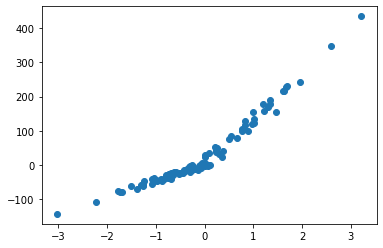

In [28]:
(x,y)= make_regression(n_samples=100,n_features=1,noise=10)
y = y + abs(y/2)
plt.scatter(x,y)

In [29]:
# 1) Je vérifie la taille de la matrice généré par mon dataset
print(x.shape)
y = y.reshape(100,1) #Pour bien généré la matrice y
print(y.shape)

(100, 1)
(100, 1)


In [31]:
# 2) Je génere ma Matrice de x et de 1
X = np.hstack((x,np.ones(x.shape)))
X = np.hstack((x**2,X))
X

array([[ 5.79305439e-01,  7.61121172e-01,  1.00000000e+00],
       [ 2.02949736e-01, -4.50499430e-01,  1.00000000e+00],
       [ 1.44220938e+00,  1.20092022e+00,  1.00000000e+00],
       [ 3.90798658e-03,  6.25138911e-02,  1.00000000e+00],
       [ 1.90775415e+00, -1.38121474e+00,  1.00000000e+00],
       [ 6.94358239e-01,  8.33281608e-01,  1.00000000e+00],
       [ 3.80724019e-02, -1.95121506e-01,  1.00000000e+00],
       [ 3.14931960e+00, -1.77463224e+00,  1.00000000e+00],
       [ 1.79597475e+00,  1.34013983e+00,  1.00000000e+00],
       [ 6.88933269e-02, -2.62475384e-01,  1.00000000e+00],
       [ 7.66087444e-01, -8.75264214e-01,  1.00000000e+00],
       [ 6.26155867e-02, -2.50231067e-01,  1.00000000e+00],
       [ 4.91817873e+00, -2.21769672e+00,  1.00000000e+00],
       [ 2.45407874e-01,  4.95386590e-01,  1.00000000e+00],
       [ 1.61282019e+00, -1.26996858e+00,  1.00000000e+00],
       [ 2.86543590e+00, -1.69275985e+00,  1.00000000e+00],
       [ 7.99272203e-01, -8.94020248e-01

In [39]:
# 3) Je génere de maniere aléatoire les valeurs a et b de ma matrice theta
theta = np.random.randn(3,1)
print(theta.shape)
theta

(3, 1)


array([[ 0.22721278],
       [-0.82406864],
       [ 0.14182307]])

In [40]:
# 4) Je défini la fonction produit de X et Theta
def Model(X,theta):
    return X.dot(theta)

Model(X,theta) 

array([[-0.35376742],
       [ 0.55917829],
       [-0.52012923],
       [ 0.09119528],
       [ 1.71350493],
       [-0.38709111],
       [ 0.31126712],
       [ 2.31980749],
       [-0.55447572],
       [ 0.37377424],
       [ 1.03716571],
       [ 0.3622577 ],
       [ 3.08683042],
       [-0.21064968],
       [ 1.5548177 ],
       [ 2.18783701],
       [ 1.06016197],
       [ 4.72205929],
       [ 1.55600579],
       [ 0.85933649],
       [ 0.81367934],
       [ 1.54126335],
       [ 1.1982925 ],
       [ 0.51288352],
       [-0.6001273 ],
       [ 0.60620783],
       [-0.04280236],
       [ 1.90233602],
       [-0.45757482],
       [ 0.42808867],
       [ 0.62694234],
       [ 1.24138308],
       [ 0.81328043],
       [-0.03464124],
       [-0.07573676],
       [ 0.89871063],
       [ 0.18475371],
       [-0.52371164],
       [-0.546933  ],
       [ 0.47085771],
       [-0.4631963 ],
       [-0.55622129],
       [-0.12807767],
       [ 0.41237187],
       [ 0.85447158],
       [-0

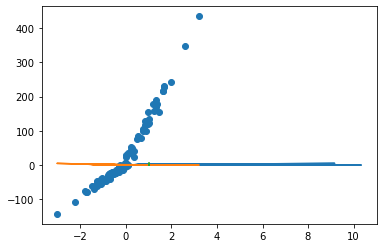

In [41]:
# 5) Jaffiche ma droite de regression par rapport à mon nuage de point
plt.scatter(x,y)
plt.plot(X,Model(X,theta))

In [35]:
# 6) Je définit ma fonction cout
def Cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m) * np.sum((Model(X,theta)-y)**2)

Cost_function(X,y,theta)

5172.524189778481

In [42]:
# 7) Je définis la fonction de gradient
def grad(X,y,theta) :
    m=len(y)
    return 1/m * X.T.dot(Model(X,theta) - y)

In [44]:
# 8) Je définis la fonction de descente de gradient
def descente_gradient(X,y,theta,learning_rate,n_iterations) :
    cost_history = np.zeros(n_iterations) #permet d'afficher ma courbe de decsente de gradient
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = Cost_function(X,y,theta)
    return theta, cost_history


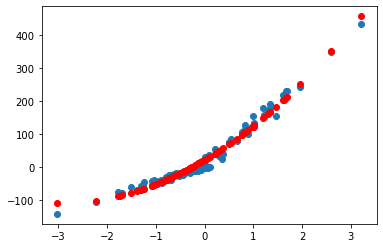

In [51]:
# Marchine learning
theta_final,cost_history = descente_gradient(X,y,theta,learning_rate=0.01,n_iterations=1000)
predictions = Model(X,theta_final)
plt.scatter(x,y)
plt.scatter(x,predictions,c="r")

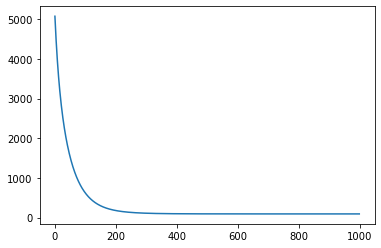

In [52]:
#Ma courbe de descente de gradient
plt.plot(range(1000),cost_history)

In [59]:
#Calcul de coef de determination
def coef_determination(y,predictions) :
    u = ((y - predictions)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - (u/v)
coef_determination(y,predictions)

0.9808695510281146